# Fourier Transform For Spectral Analyses

In [86]:
%cd AI/BCI/courses/signal_processing/2.spectral_analysis

import numpy as np
import matplotlib.pyplot as plt

C:\Users\Viacheslav_Bobrov\AI\BCI\courses\signal_processing\2.spectral_analysis


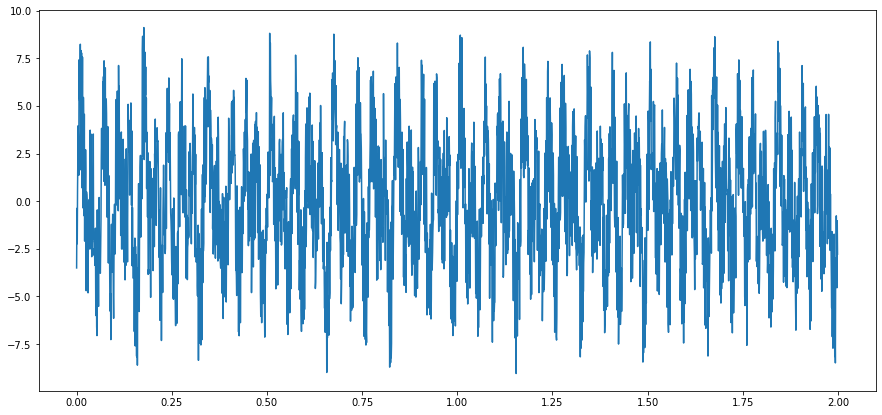

In [24]:
# FOURIER TRANSFORM FOR SPECTRAL ANALYSES


sampling_rate = 1234
n_points = sampling_rate * 2  # 2 seconds
time = np.arange(0, n_points) / sampling_rate

frequencies_to_include = [12, 18, 30]

signal = np.zeros(n_points)

for fi in range(len(frequencies_to_include)):
    signal += (fi + 1) * np.sin(2 * np.pi * frequencies_to_include[fi] * time)

noise_level = 4
signal += np.random.uniform(-noise_level, noise_level, n_points)
plt.figure(figsize=(15, 7))
plt.plot(time, signal)


Text(0.5, 1.0, 'Frequencies [12, 18, 30] ')

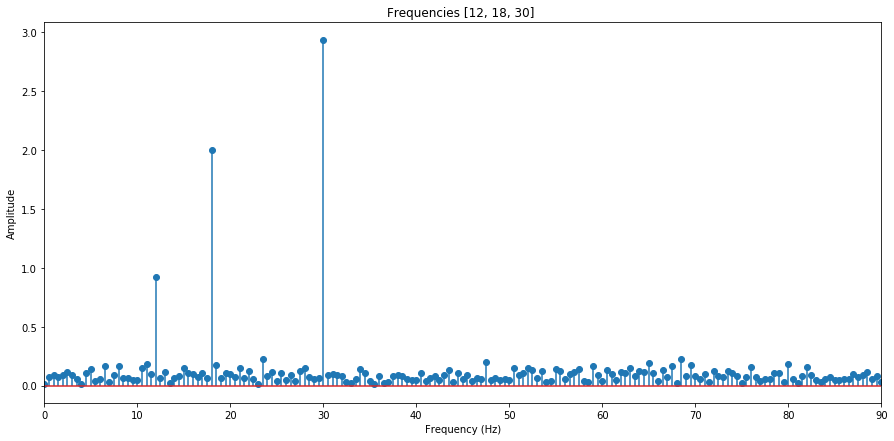

In [56]:
# returns frequencies from 0 to Nyquist (sample_rate/2), complex numbers
signal_fft = np.fft.fft(signal)  

# abs turns complex values into real values, the x2 and /n_points is a normalization
# to retrieve the original points. If you are interested only in shape of fft, normalization can be skipped
signal_amplitude_fft = 2 * abs(signal_fft) / n_points

# fft returns n_points amount of frequencies in diapason [0;sample_rate/2], but with x2 step
# to view real values we should return x2 step to step by n_points / 2
hz = np.linspace(0, sampling_rate / 2, int(np.floor(n_points / 2) + 1))

plt.figure(figsize=(15, 7))
plt.stem(hz, signal_amplitude_fft[0:len(hz)], use_line_collection='True')
plt.xlim([0, max(frequencies_to_include) * 3])  # show some other frequencies to the right for comparison
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequencies %s ' % frequencies_to_include)


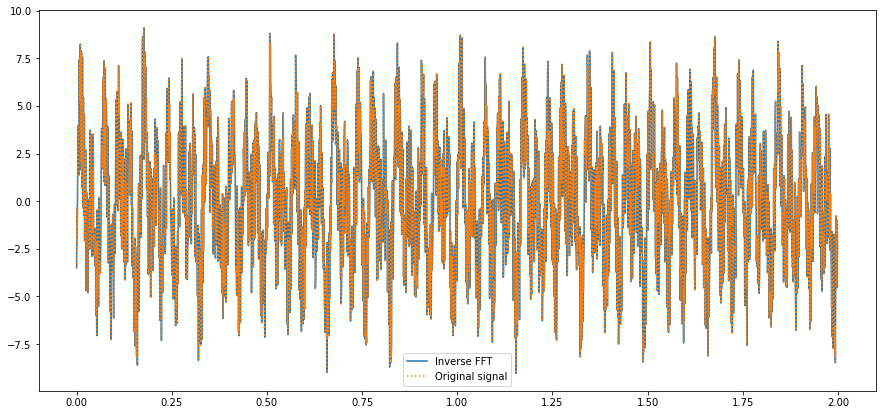

In [83]:
signal_fft_inverse = np.fft.ifft(signal_fft) 
plt.figure(figsize=(15, 7))

plt.plot(time, signal_fft_inverse, label='Inverse FFT')
plt.plot(time, signal, linestyle='dotted', label='Original signal')
plt.legend()


# Welch's Method

Text(0.5, 1.0, 'Raw EEG signal')

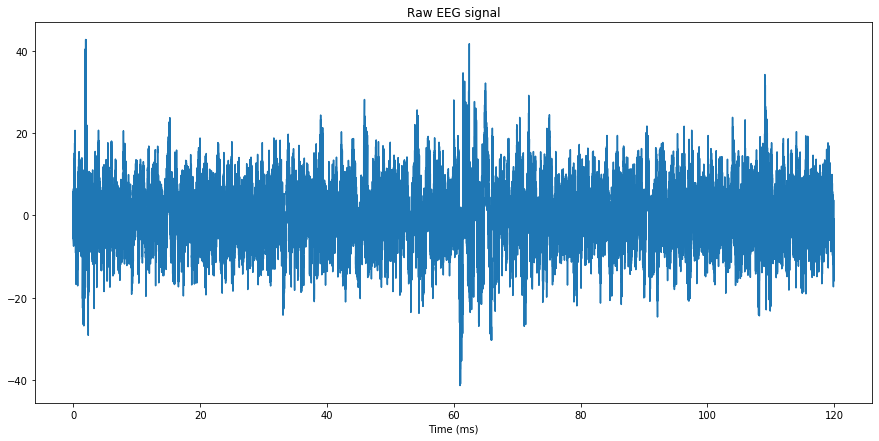

In [112]:
# WELCH'S METHOD

from scipy.io import loadmat

eeg_mat = loadmat('EEGrestingState.mat')
eeg_signal = eeg_mat['eegdata'][0]
eeg_sampling_rate = eeg_mat['srate'][0][0]

n_eeg = len(eeg_signal)
eeg_time = np.arange(0, n_eeg) / eeg_sampling_rate

plt.figure(figsize=(15, 7))
plt.plot(eeg_time, eeg_signal)
plt.xlabel('Time (ms)')
plt.title('Raw EEG signal')


Text(0.5, 0, 'Frequency (Hz)')

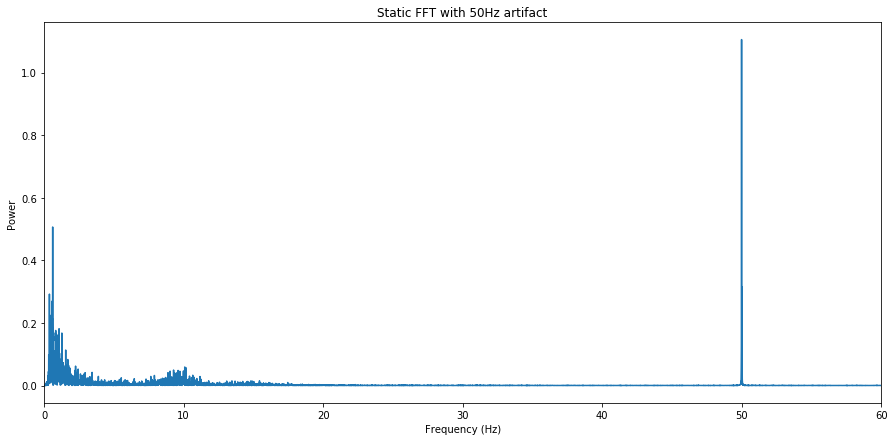

In [113]:
eeg_signal_pow = abs(np.fft.fft(eeg_signal) / n_eeg) ** 2
eeg_hz = np.linspace(0, eeg_sampling_rate / 2, int(np.floor(n_eeg / 2) + 1))

plt.figure(figsize=(15, 7))
plt.plot(eeg_hz, eeg_signal_pow[0:len(eeg_hz)])
plt.xlim([0, 60])
plt.title('Static FFT with 50Hz artifact')
plt.ylabel('Power')
plt.xlabel('Frequency (Hz)')


Text(0.5, 1.0, 'Hann window to attenuate edge artifacts')

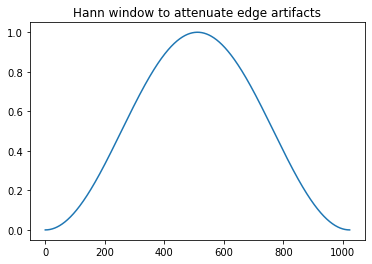

In [138]:
window_length = 1 * eeg_sampling_rate  # 1 sec

# Number of points to overlap for each window
n_overlap = round(eeg_sampling_rate / 2)

# Window onset times
window_onsets = np.arange(0, n_eeg - window_length, n_overlap).astype(int)

# Different-length signal needs a different-length Hz vector
hz_welch = np.linspace(0, eeg_sampling_rate / 2, int(np.floor(window_length / 2) + 1))

hann_window = .5 - np.cos(2 * np.pi * np.linspace(0, 1, int(window_length))) / 2
plt.plot(hann_window)
plt.title('Hann window to attenuate edge artifacts')

Text(0.5, 0, 'Frequency (Hz)')

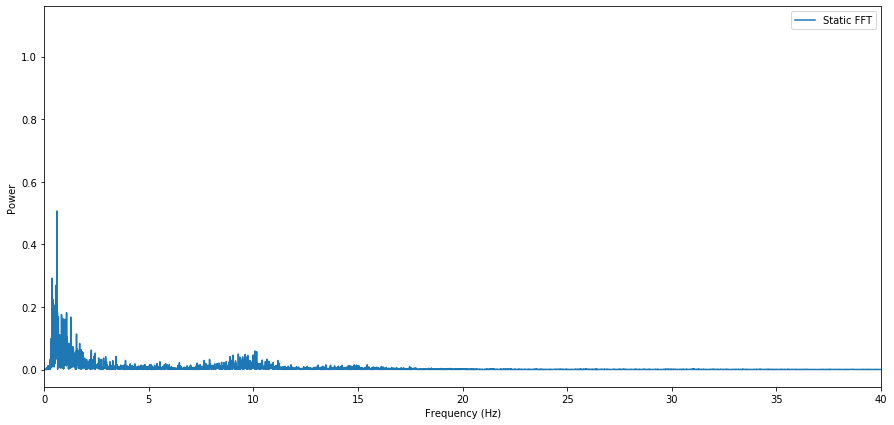

In [163]:
eeg_power_welch = np.zeros(len(hz_welch))
for i in range(len(window_onsets)):
    eeg_epoch = eeg_signal[window_onsets[i]:window_onsets[i] + window_length]
    eeg_epoch *= hann_window
    temp_eeg_epoch_power = abs(np.fft.fft(eeg_epoch) / window_length) ** 2
    eeg_power_welch += temp_eeg_epoch_power[0:len(hz_welch)]

eeg_power_welch /= len(window_onsets)

plt.figure(figsize=(15, 7))

plt.plot(eeg_hz, eeg_signal_pow[0:len(eeg_hz)], label='Static FFT')
plt.xlim([0, 40])
plt.legend()
plt.ylabel('Power')
plt.xlabel('Frequency (Hz)')


Text(0.5, 0, 'Frequency (Hz)')

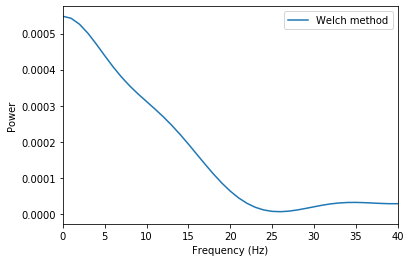

In [164]:
plt.plot(hz_welch, eeg_power_welch, label='Welch method')
plt.xlim([0, 40])
plt.legend()
plt.ylabel('Power')
plt.xlabel('Frequency (Hz)')

Text(0, 0.5, 'Power')

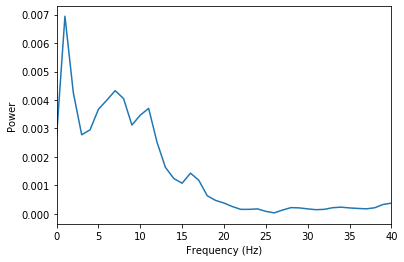

In [171]:
# WELCH IN PYTHON

import scipy.signal

f, welchpow = scipy.signal.welch(eeg_signal, fs=eeg_sampling_rate, window=hann_window,
                                 nperseg=window_length, noverlap=window_length / 2)

plt.plot(f, welchpow)
plt.xlim([0, 40])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')


# Time-Frequency Spectrogram

(450879, 2)


Text(0.5, 1.0, 'Time domain')

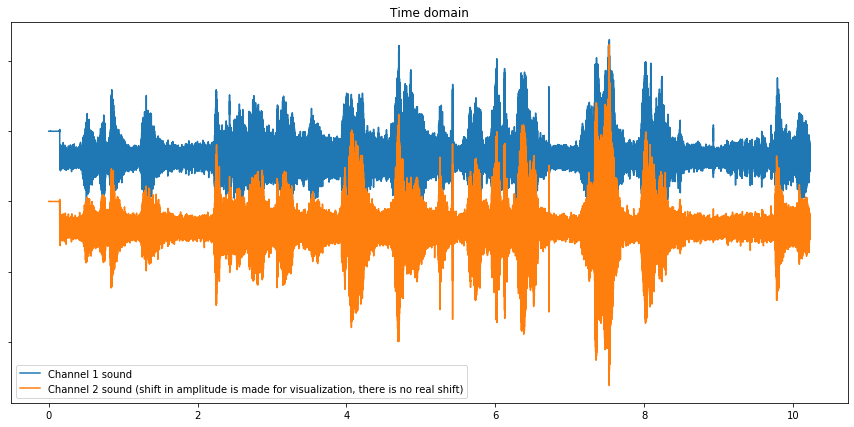

In [196]:
# TIME-FREQUENCY SPECTROGRAM
import scipy.io.wavfile

bird_sample_freq, bird_signal = scipy.io.wavfile.read('bird_singing.wav')
bird_signal_channel1 = bird_signal[:, 0]
bird_signal_channel2 = bird_signal[:, 1]
print(bird_signal.shape)
bird_time = np.arange(0, len(bird_signal)) / bird_sample_freq

plt.figure(figsize=(15, 7))
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.plot(bird_time, bird_signal_channel1, label='Channel 1 sound')
plt.plot(bird_time, bird_signal_channel2 - 5000,
         label='Channel 2 sound (shift in amplitude is made for visualization, there is no real shift)')
plt.legend(loc='lower left')
plt.title('Time domain')


Text(0.5, 1.0, 'Frequency domain')

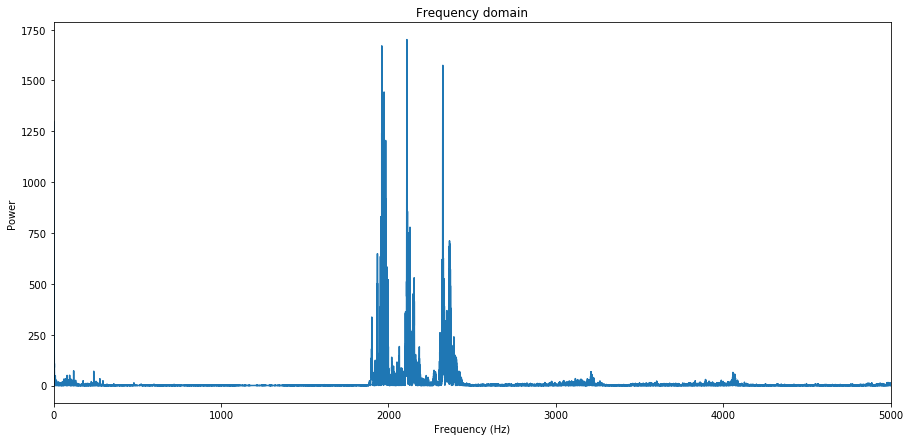

In [198]:
bird_signal_channel1_power = abs(
    np.fft.fft(scipy.signal.detrend(bird_signal_channel1)) / len(bird_signal_channel1)) ** 2
bird_fft_hz = np.linspace(0, bird_sample_freq / 2, int(np.floor(len(bird_signal_channel1) / 2) + 1))

plt.figure(figsize=(15, 7))
plt.plot(bird_fft_hz, bird_signal_channel1_power[0:len(bird_fft_hz)])
plt.xlim([0, 5000])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Frequency domain')


(129,)
(2012,)
(129, 2012)


Text(0.5, 1.0, 'Time-Frequency domain')

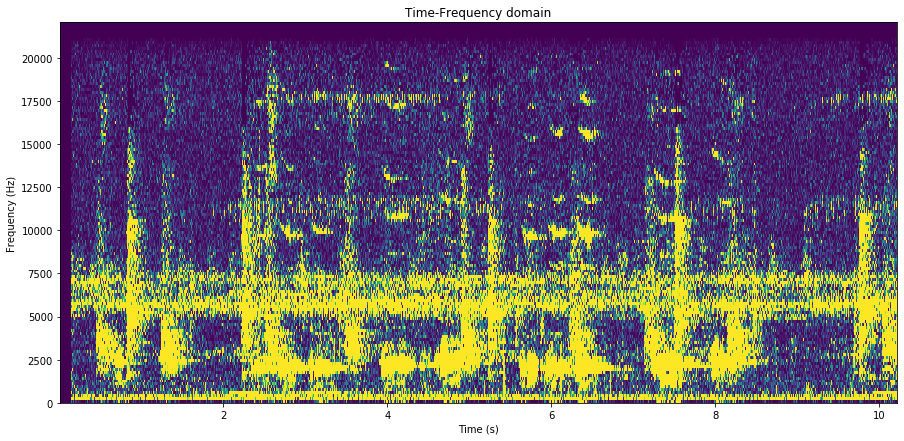

In [202]:
frequencies, times, power = scipy.signal.spectrogram(bird_signal_channel1, bird_sample_freq)
print(frequencies.shape)
print(times.shape)
print(power.shape)
plt.figure(figsize=(15, 7))
plt.pcolormesh(times, frequencies, power, vmin=0, vmax=9)
plt.xlabel('Time (s)'), plt.ylabel('Frequency (Hz)')
plt.title('Time-Frequency domain')
